<a href="https://colab.research.google.com/github/devAquino/Analise_Credit/blob/main/Analise_Credit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install plotly --upgrade

In [2]:
import pandas as pd
import numpy as np 
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

Analizando o dataset credit_data. É uma base de crédita obtida do keglle
em: http:www.kaggle.com/laotse/credit-risk-dataset  
O intuito é fazer uma análise de risco de crédito e fixar o conhecimento.

In [3]:
base_credito = pd.read_csv('/content/drive/MyDrive/Bases de dados/credit_data.csv')

In [5]:
base_credito

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


*A coluna default contem os valores 0-Pagou a dívida e 1-Não pagou a dívida*

In [6]:
# Utilizando o describe, podermos observar uma contagem dos registros, a média,
# o desvio padrão, o primeiro, segundo e terceiro quartil, o valor mínimo e
# máximo de cada registro
base_credito.describe()

,clientid,income,age,loan,default
count,2000.000000,2000.000000,1997.000000,2000.000000,2000.000000
mean,1000.500000,45331.600018,40.807559,4444.369695,0.141500
std,577.494589,14326.327119,13.624469,3045.410024,0.348624
min,1.000000,20014.489470,-52.423280,1.377630,0.000000
25%,500.750000,32796.459717,28.990415,1939.708847,0.000000
50%,1000.500000,45789.117313,41.317159,3974.719419,0.000000
75%,1500.250000,57791.281668,52.587040,6432.410625,0.000000
max,2000.000000,69995.685578,63.971796,13766.051239,1.000000


O dataset possui 2000 registros mas podemos observar que no count na coluna idade só há 1997 registros. Com isso podemos inferir que há 3 registros sem idade preenchida.

In [7]:
# Armazenando o valor da maior renda numa variável
maior_renda = max(base_credito.income)
maior_renda

69995.6855783239

In [16]:
base_credito[base_credito["income"]>60000]

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
4,5,66952.688845,18.584336,8770.099235,1
10,11,64131.415372,25.679575,4351.028971,0
12,13,61050.346079,26.355044,5893.264659,0
14,15,63061.960174,39.201553,1850.369377,0
...,...,...,...,...,...
1983,1984,64466.760138,33.327144,8537.369666,1
1984,1985,64636.402186,60.886966,2583.106425,0
1986,1987,67994.988470,38.622259,7289.014109,0
1996,1997,69516.127573,23.162104,3503.176156,0


In [17]:
np.unique(base_credito.default, return_counts=True)

(array([0, 1]), array([1717,  283]))

*Podemos observar a cima que 1717 pessoas pagam o empréstimo enquanto que 283 não pagam o empréstimo.*

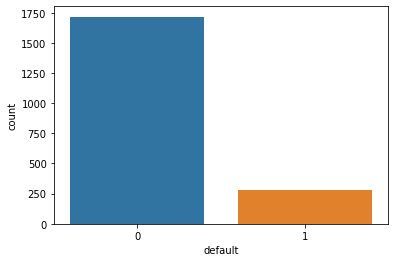

In [19]:
# Utilizando o seaborn para plotar um gráfico de barras.
# Podemos observer no gráfico que a quantidade de pessoas que pagam seus 
# empréstimos(barra azul) é bem superior as que não pagam (barra laranja)
sns.countplot(x = base_credito.default);

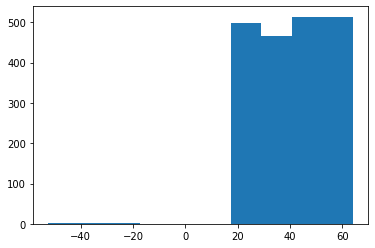

In [25]:
# Com o gráfico hist podemos observar a frequência das idades,
# aqui, as idades giram em torno de 500 sendo que a mairo 
# frequência é de pessoas a cima dos 40 anos.
# Há também idades negativas. Esses dados serão tratados posteriormente
plt.hist(x = base_credito.age);